In [1]:
#Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

## Data Visualization

In [3]:
# Define list of Continuous columns Names
continuous = ['avg_price_per_room', 'lead_time', 'arrival_month', 'arrival_date']

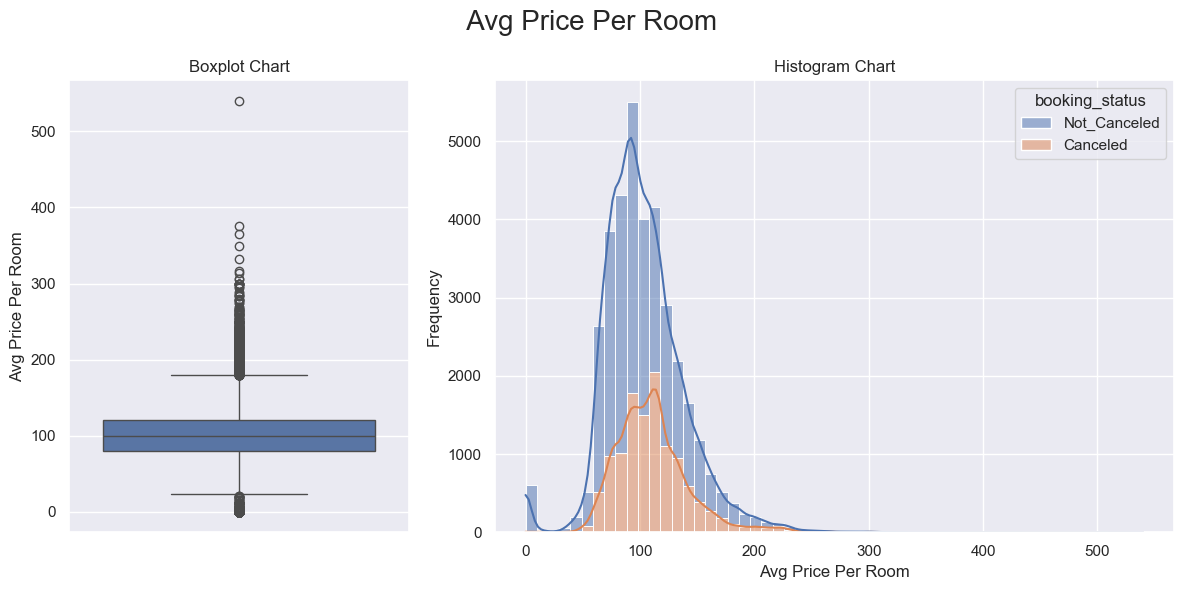

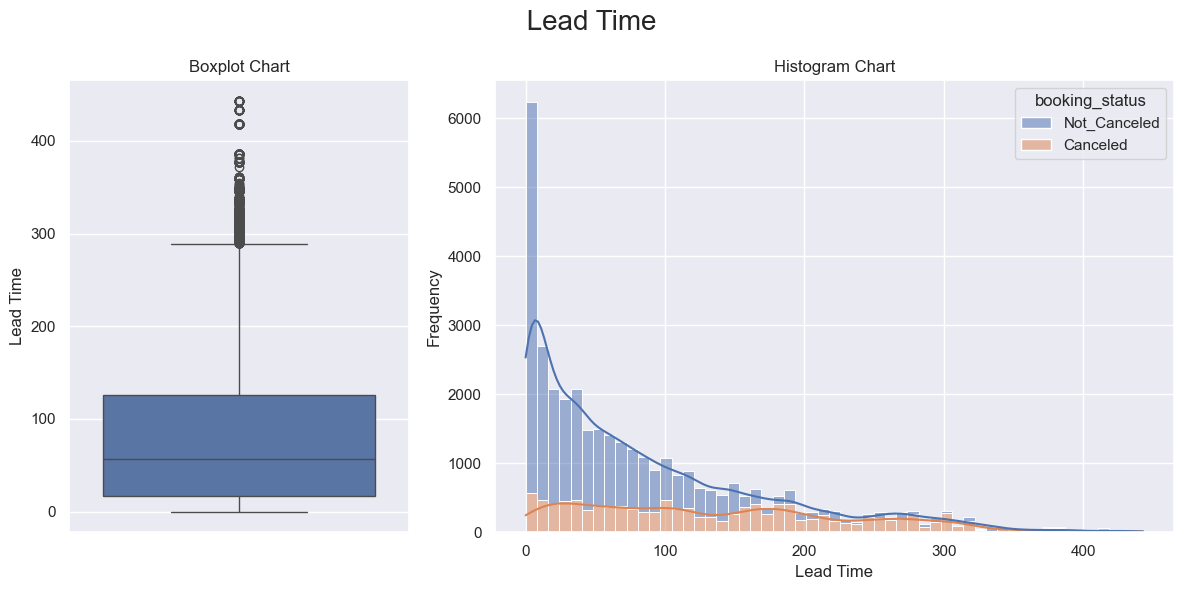

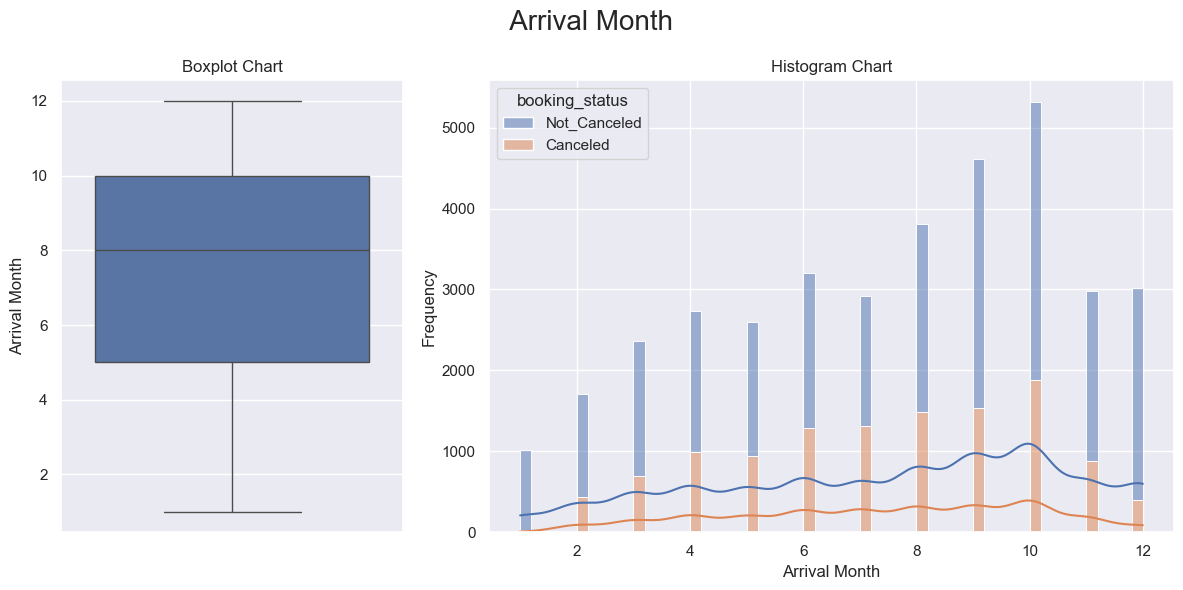

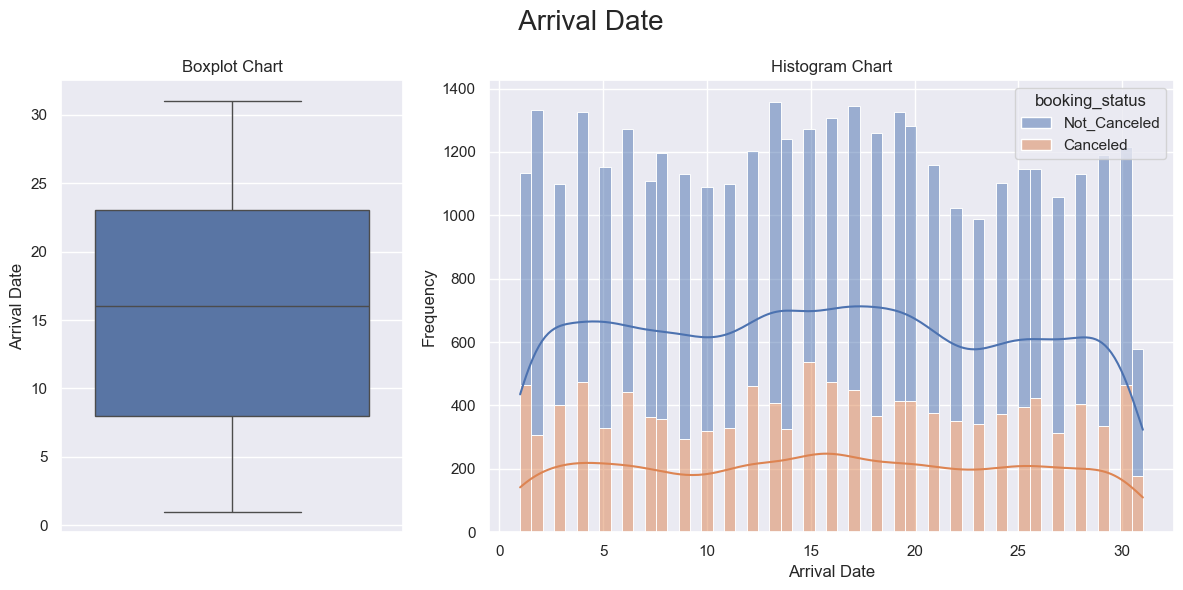

In [4]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()    
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'booking_status')    

In [5]:
categorical = ['required_car_parking_space', 'repeated_guest', 'market_segment_type', 'type_of_meal_plan']

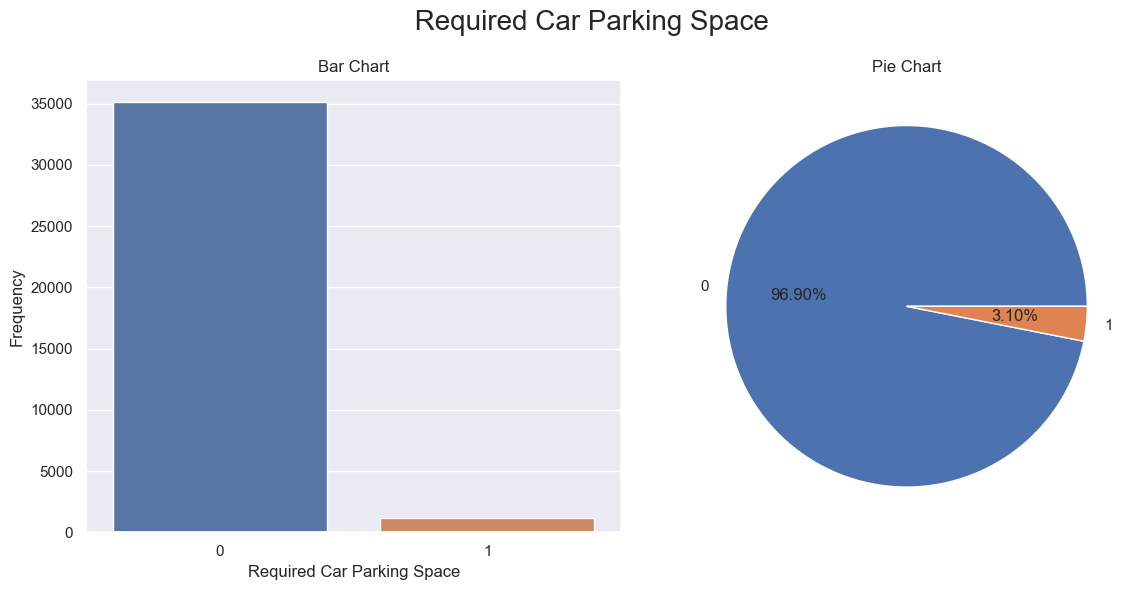

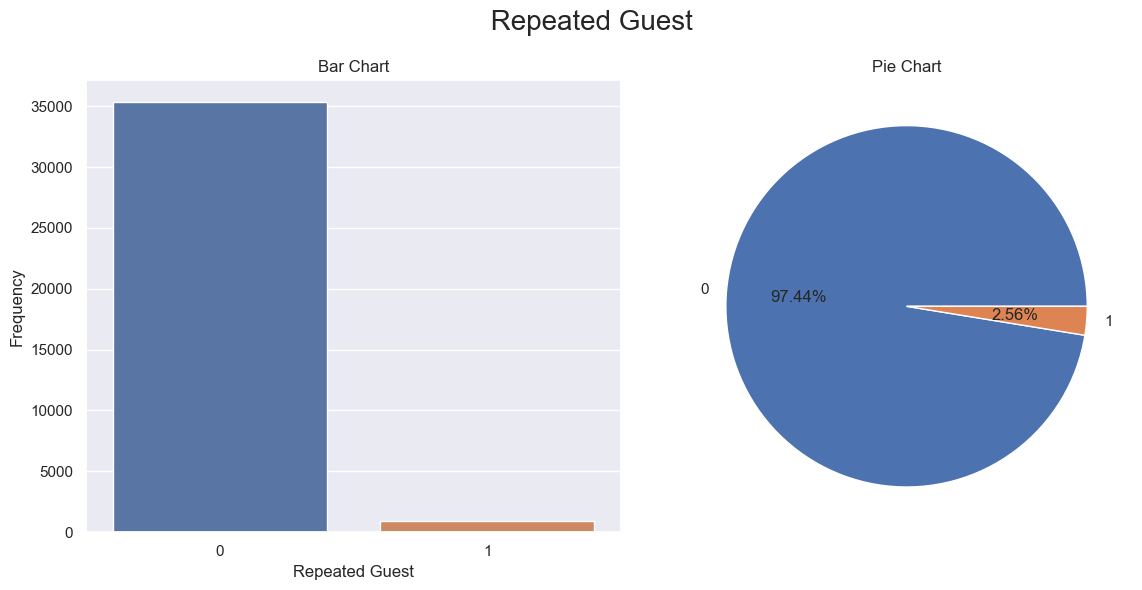

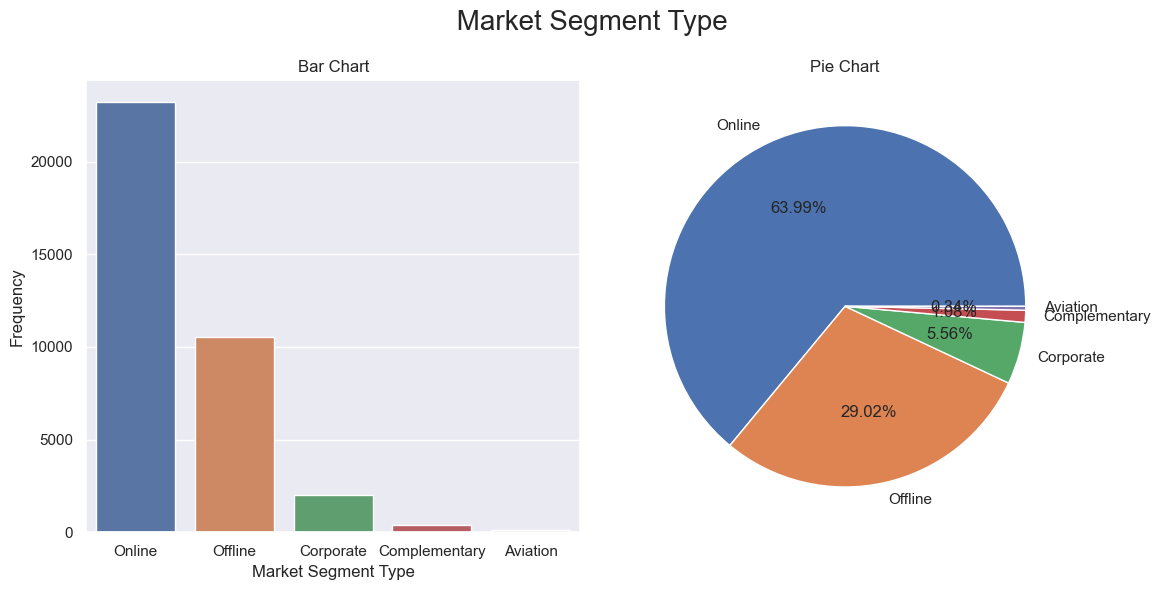

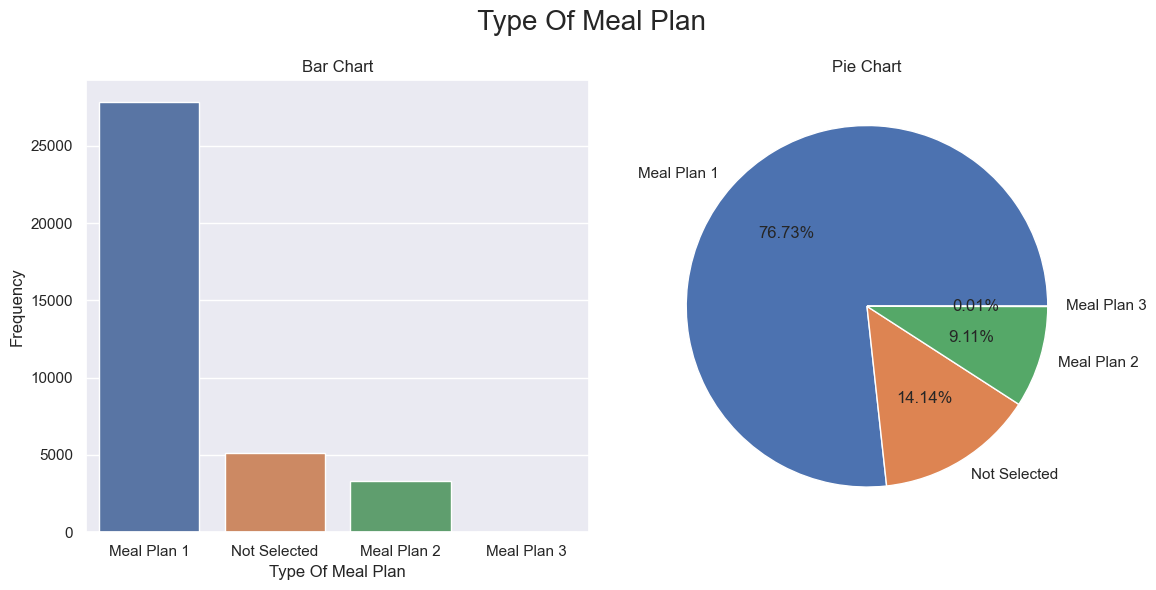

In [6]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.barplot(df[column].value_counts(), ax=ax[0], palette='deep')
    ax[0].set_title('Bar Chart')
    ax[0].set_xlabel(title(column))
    ax[0].set_ylabel('Frequency')
    
    
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_ylabel(None)
    
    plt.tight_layout()
    plt.show()
    
for cat in categorical:
    plot_categorical_distribution(df, cat)

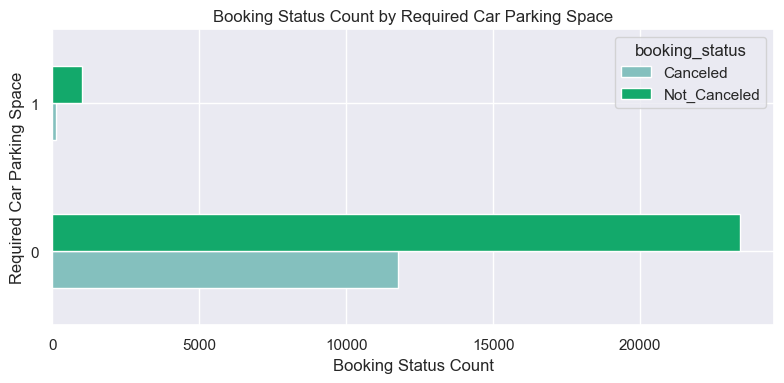

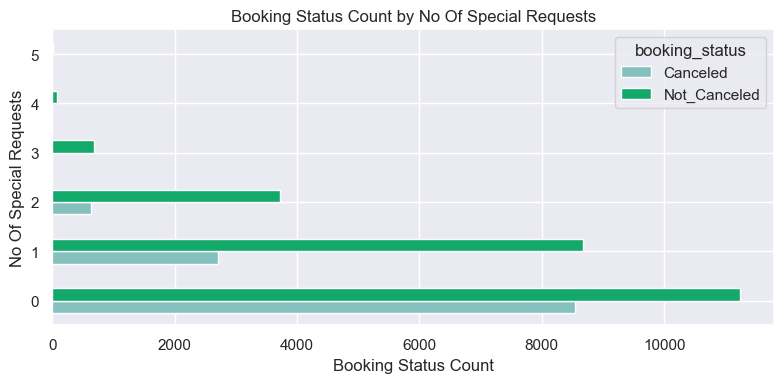

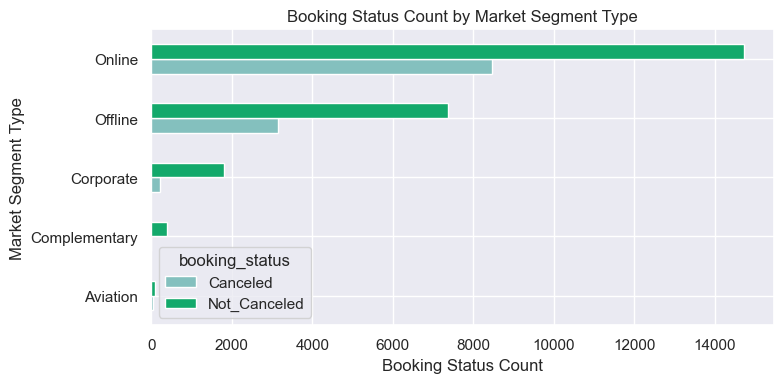

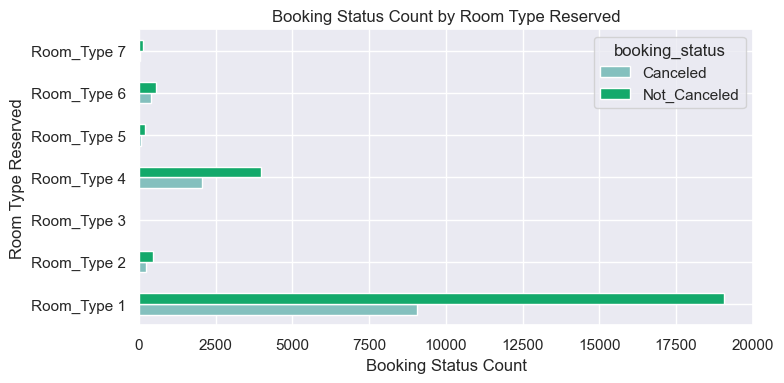

In [7]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x, y]).size().unstack()
    barh.plot(kind='barh',  color = ['#84c0be', '#13a96b'], figsize=(8,4))
    plt.title(f'{title(y)} Count by {title(x)}')
    plt.xlabel(f'{title(y)} Count')
    plt.ylabel(title(x))

    plt.tight_layout()
    plt.show()

bar_plot('required_car_parking_space', 'booking_status', df)
bar_plot('no_of_special_requests', 'booking_status', df)
bar_plot('market_segment_type', 'booking_status', df)
bar_plot('room_type_reserved', 'booking_status', df)

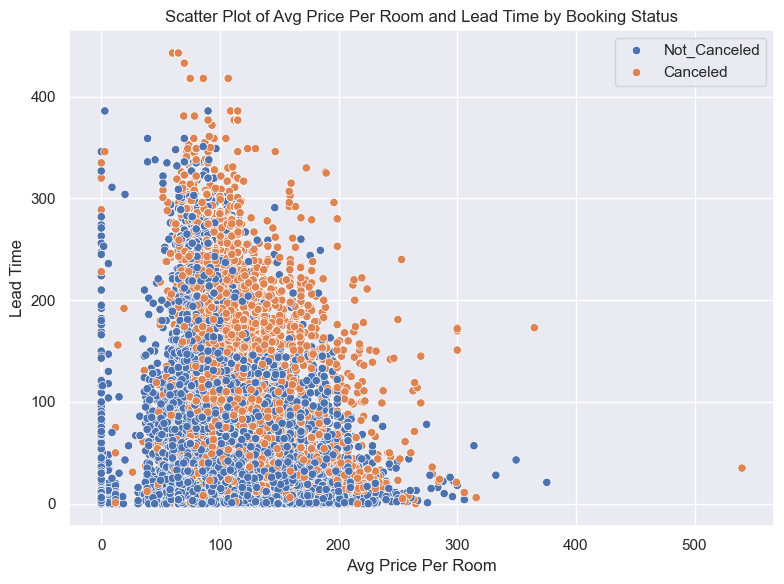

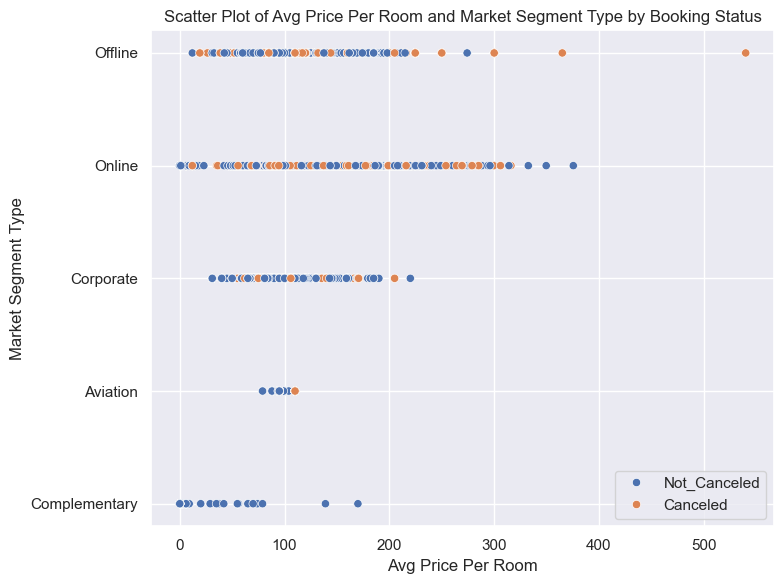

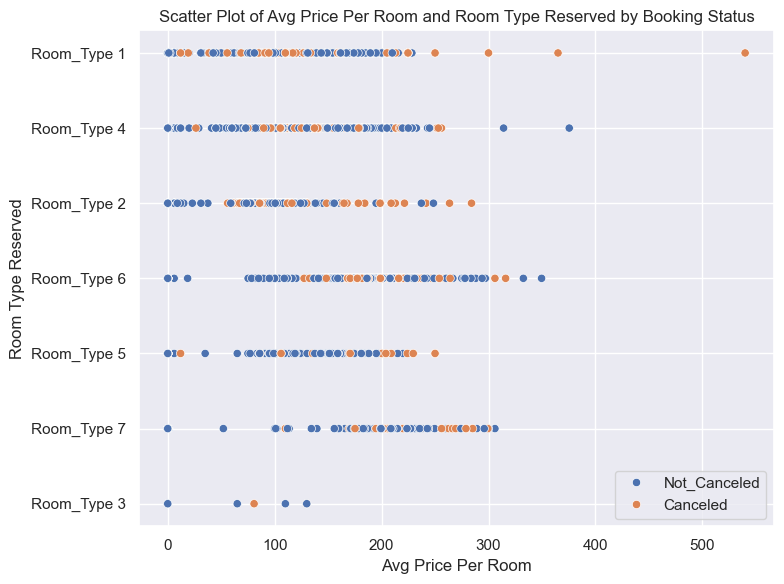

In [8]:
# Define a Function for Scatter Plot
def scatter_plot(data, x, y, hue):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue)
    plt.title(f'Scatter Plot of {title(x)} and {title(y)} by {title(hue)}')
    plt.xlabel(title(x))
    plt.ylabel(title(y))
    plt.legend(title=None)

    plt.tight_layout()
    plt.show()

scatter_plot(data=df, x="avg_price_per_room", y="lead_time", hue="booking_status")
scatter_plot(data=df, x="avg_price_per_room", y="market_segment_type", hue="booking_status")
scatter_plot(data=df, x="avg_price_per_room", y="room_type_reserved", hue="booking_status")

## Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

stc_cols = ['lead_time', 'avg_price_per_room']
dum_cols = ['market_segment_type', 'arrival_year', 'room_type_reserved', 'required_car_parking_space']
le_cols = ['booking_status', 'repeated_guest']
# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply Label Encoder to the selected column
for col in le_cols :
    df[col] = le.fit_transform(df[col])

# Apply get_dummies to the selected column
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [57]:
from sklearn.model_selection import train_test_split 

x = df.drop(['booking_status', 'Booking_ID', 'type_of_meal_plan'], axis=1)
y = df['booking_status']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [59]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()


Training accuracy: Gradient Boosting 0.8552377670572019
Test accuracy: Gradient Boosting 0.8486560992419021

Training accuracy: K-Nearest Neighbors 0.8907305306685045
Test accuracy: K-Nearest Neighbors 0.837077877325982

Training accuracy: Random Forest 0.9940041350792557
Test accuracy: Random Forest 0.906960716747071

Training accuracy: Decision Tree 0.9940041350792557
Test accuracy: Decision Tree 0.8715368711233632

Training accuracy: XGB Classifier 0.9176774638180565
Test accuracy: XGB Classifier 0.8923501033769814



In [60]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

score = rf.score(x_train, y_train)
accuracy = accuracy_score(y_test, y_pred)

print(f'Training accuracy: {round(score, 3)}')
print(f'R-squared (Random Forest): {round(accuracy, 3)}')

Training accuracy: 0.994
R-squared (Random Forest): 0.907


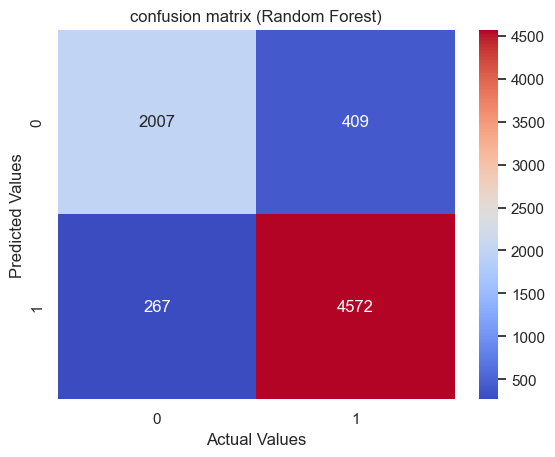

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix (Random Forest)')
plt.show()

In [69]:
# Visualize Classification report for Random Forest Classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      2416
           1       0.92      0.94      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.89      0.89      7255
weighted avg       0.91      0.91      0.91      7255



### Summary and Conclusion for Hotel Reservation Cancellation Prediction Dataset

In this project, our objective was to predict hotel reservation cancellations using a given dataset. The steps involved in the data preprocessing and model training are detailed below:

1. Data Cleaning:
   - Fortunately, the dataset was already clean and did not require any changes or corrections in the column values.

2. Data Visualization:
   - Comprehensive data visualizations were created to gain insights and understand patterns within the data. These visualizations were crucial in identifying trends and relationships that could be leveraged for prediction.

3. Standardization and Label Encoding:
   - The data was standardized to ensure consistent scaling across all numerical features.
   - Categorical features were label-encoded to convert them into a format suitable for the machine learning model.

4. Model Training:
   - A Random Forest model was trained on the preprocessed data. This model was chosen due to its ability to handle complex datasets and provide robust predictions.

5. Model Performance:
   - The trained Random Forest model achieved an accuracy of 90.7%. This indicates that the model performs well in predicting whether a hotel reservation will be canceled based on the given features.

### Conclusion

The project involved a systematic approach to handling a hotel reservation cancellation dataset. Despite the initial cleanliness of the data, we ensured thorough data visualization, standardization, and label encoding to prepare the data for modeling. The insights gained from the visualizations were instrumental in understanding the data better. The Random Forest model, known for its robustness, proved effective in predicting cancellations, achieving a high accuracy of 90.7%.

This structured methodology underscores the importance of data visualization and preprocessing, even when the data appears clean, as it provides valuable insights that enhance model performance. The successful application of the Random Forest model in this project demonstrates its suitability for similar classification tasks.
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com